# Image Processing with Python: Morphological Operations

by: Jephraim C. Manansala | Published on https://jephraim-manansala.medium.com/

### How do we clean and prepare images?

In this post, we will explore how to clean, prepare and enhance images using morphological operations. This technique is especially useful in higher-level image processing applications such as image segmentation.

Let’s begin.

As usual, we import libraries such as `numpy` and `matplotlib`. Additionally, we import specific functions from the `skimage` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

But first, what are **morphological operations**? These are a set of image processing operations where the shapes of the image’s objects are manipulated. Similar to convolutional kernels, morphological operations utilize a structuring element to transform each pixel of an image to a value based on its neighbors’ value.

Let’s define a **structuring element**. These can be an array of any size — as long as it has a smaller shape than the input image.

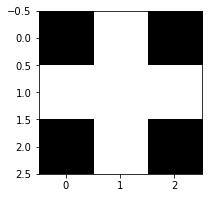

In [2]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.figure(figsize=(3,3))
plt.imshow(element, cmap='gray');

To demonstrate how morphological operations work, let us create two adjacent circles with random noise on its background.

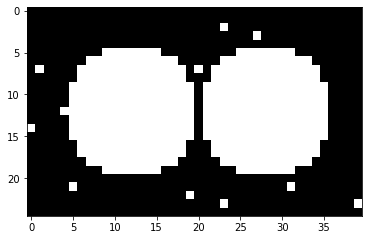

In [3]:
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range(20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
plt.figure(figsize=(6,6))
plt.imshow(circle_image, cmap='gray');

Let’s apply the most common morphological operations — `erosion` and `dilation`. **Erosion** removes islands and small objects so that only the key features will remain. Meanwhile, **dilation** makes objects more visible and fills in small holes in objects.

Text(0.5, 1.0, 'Dilated Image')

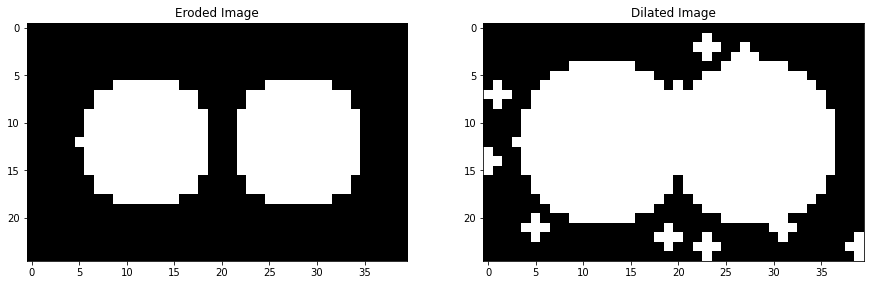

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(erosion(circle_image, element), cmap='gray');
ax[0].set_title('Eroded Image')
ax[1].imshow(dilation(circle_image, element), cmap='gray')
ax[1].set_title('Dilated Image')

Notice how the eroded image is smaller than the original image — this is because the outermost layer of the circles is *eroded*. This operation also eroded the random noise in the background. On the flip side, the dilated image did the opposite — the two circles *expanded* to the point that they already touched each other. Moreover, the random noise grew using the dilation operation.

Moreover, in certain applications, a single erosion or dilation operation might not be enough. This is especially true for *images with a large number of pixels*. Because of this, we can do successive erosion and dilation operations using this function.

In [5]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im

def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

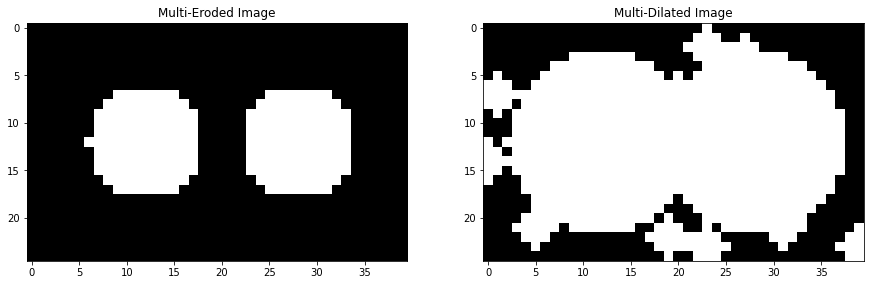

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image');

See how the successive erosion and dilation work? I suggest you use this function wisely since successive morphological operations can easily blow up your image — not to mention the long time it takes to run the codes.

Now that we had understood how the basic morphological operations work, let’s use the combination of these operations. The `opening` operation is a successive combination of erosion and dilation operations. Meanwhile, the `closing` operation is the successive combination of dilation and erosion operations.

Text(0.5, 1.0, 'Closed Image')

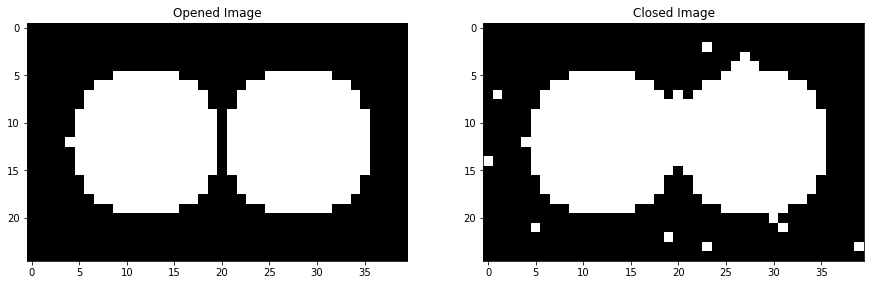

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(opening(circle_image, element), cmap='gray');
ax[0].set_title('Opened Image')
ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')

Notice how the `opening` operation removed the object’s random noise while also maintaining the original shape of the two adjacent circles? By applying the `erosion` operation first, we have removed the random noise. After which, when `dilation` operation was applied, the only objects remaining to dilate are the two adjacent circles.

Meanwhile, on the `closing` operation, notice how the two adjacent circles are still of the same diameter, and the random noise is still present. However, the two circles are now touching each other. By applying the `dilation` operation first, the two circles are joined together, and the random noises are intensified. After which, when the `erosion` operation was applied, the circles’ outermost sides are eroded, but the adjoined portion is maintained. Moreover, the random noise was eroded back to its original shape.

Cool, right?

Now, we will be using an actual image. Here is an image of the vines of a sponge gourd *(patola)* in a lattice frame. Let’s try to apply morphological operations to get a cleaned and binarized image of the dried leaves.

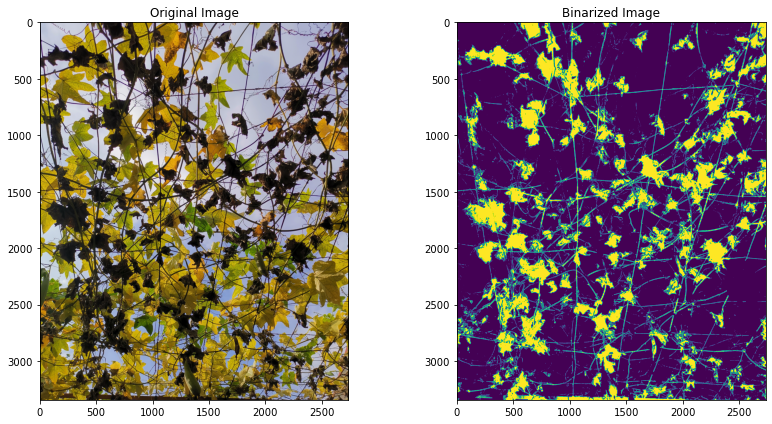

In [8]:
from skimage.color import rgb2gray
leaves = imread('leaves.jpg')

fig, axis = plt.subplots(1,2, figsize=(12,6))
axis[0].imshow(leaves);
axis[0].set_title('Original Image')

binary = rgb2gray(leaves)<0.15
axis[1].imshow(binary)
axis[1].set_title('Binarized Image')
plt.tight_layout()

Even though we applied a low value to threshold the binary image, the binary image is still dirty. This is because of the vines and the lattice frame that is also of the same shade. Luckily, the vines and lattice frame is much thinner than the leaves — thus, we can apply **morphological operations**.

Let’s define a structuring element. Notice how we will use a 7x7 element because of the larger shape of the actual image. A rule of thumb on setting the structuring element is to look at the objects you want to remove and the objects you want to remain. The shape of the structuring element should be larger than the pixels of the objects you wanted to remove and smaller than the pixel of the objects you want to remain.

In [9]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])

Using this structuring element, we can apply successive `erosion` operations to remove the vines and the lattice frame.

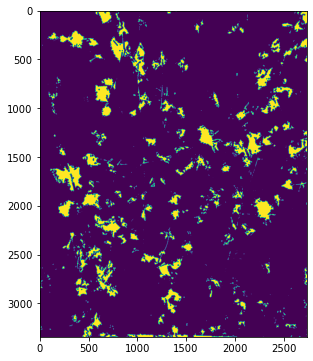

In [10]:
plt.figure(figsize=(6,6))
multi_eroded = multi_ero(binary, 2, element)
plt.imshow(multi_eroded)

After the successive `erosion`, the majority of the unnecessary objects and artifacts are eroded. However, notice how there is still minute noise in some areas. We can remove this by applying the `opening` operation.

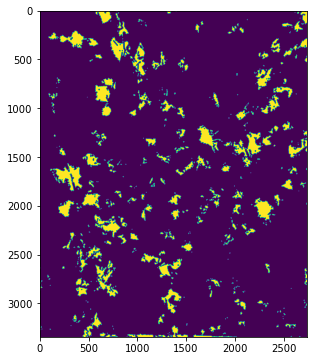

In [11]:
plt.figure(figsize=(6,6))
opened = opening(multi_eroded, element)
plt.imshow(opened);

See the changes in the image? It is *very minute*, but the remaining noise was removed by applying the opening operation while still maintaining the key feature of the image. This is vital because our next step is `dilation` which can easily magnify the remaining noise. *I suggest you try to skip this step to see the effects of not opening the image.*

Now, since we have applied successive `erosion`, the objects’ size and shape are smaller than the original. To approximately restore their size, we have to apply successive `dilation` with the same number of times we applied the erosion. Moreover, we should use the same structuring element to ensure that the restoration of the features’ shape as close to the original as possible.

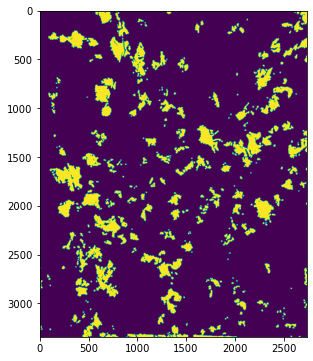

In [12]:
plt.figure(figsize=(6,6))
multi_diluted = multi_dil(opened, 2, element)
plt.imshow(multi_diluted);

Now, we have obtained our objects of interest: the dried leaves from the original image. However, notice how leaves are falling apart. We can fix this by applying morphological operations such as the `area_opening`, and `area_closing`. These operations are similar to the ones previously discussed. The difference is that they do not use a fixed structuring element, but rather a deformable one based on the area_threshold parameter.

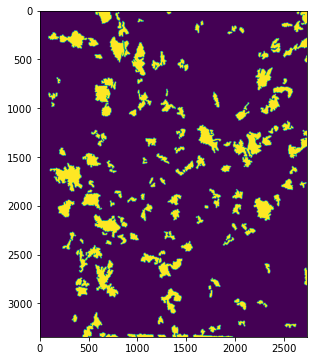

In [13]:
plt.figure(figsize=(6,6))
area_morphed = area_opening(area_closing(multi_diluted, 1000), 1000)
plt.imshow(area_morphed);

Through the use of `area_closing` and `area_opening`, we can further fill the holes inside the objects and clear the noise — and this was all done without a structuring element. Amazing, right? However, note that these area-based morphological operations will require some level of preprocessing prior to using it.

Now, we have our final output! You might ask about the use of this resulting image. Well, we can use this image to compute the percent cover of dried leaves on the image. We can also use this resulting image as a mask for future image processing techniques, such as image segmentation.

#### In summary

We have explored how different morphological operations — such as `erosion`, `dilation`, `opening`, `closing`, `area_opening`, and `area_closing` — can be used to pre-process and clean our image. Applying these operations might seem complicated — and I must admit, it can really be challenging to do. However, through continuous practice, I believe anyone can perform these image processing operations!